In [4]:
%reload_ext algo

from IPython.display import HTML
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from math import factorial
from itertools import permutations


from algo import *

import time

In [7]:
def code_shape(c):
    d = {j:0 for j in range(len(c))}
    for i in c:
        d[i] += 1
    return sorted([d[i] for i in d if d[i] > 0], reverse=True)


In [8]:
head = """
<html>

<head>
  <script src="https://code.jquery.com/jquery-3.4.1.min.js" integrity="sha256-CSXorXvZcTkaix6Yvo6HppcZGetbYMGWSFlBw8HfCJo=" crossorigin="anonymous">
  </script>
  <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.10.20/css/jquery.dataTables.css">

  <script type="text/javascript" charset="utf8" src="https://cdn.datatables.net/1.10.20/js/jquery.dataTables.js"></script>
  <script>
    $(document).ready(function() {
      $('#table_id').DataTable();
    });
  </script>
</head>

<body>
"""

tail = """
</body>

</html>"""

In [9]:
n = 3
id = list(range(1, n+1))

[w for w in permutations(id)]

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

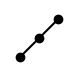

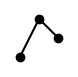

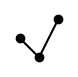

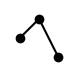

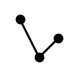

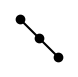

In [10]:


def createFigure(w):
    fig, ax = plt.subplots(figsize=(.75,.75))
    ax.axis([0.5,n+.5,0.5,n+.5])
    ax.axis("off")
    ax.plot(id, w, 'k', marker='o')
    return fig

def mapping(w):
    fig = createFigure(w)
    fname = "img/map_{}.png".format(w)
    fig.savefig(fname)
    imgstr = '<img src="{}" /> '.format(fname)
    return imgstr



#pd.set_option('display.max_colwidth')
#HTML(df.to_html(escape=False))

for n in [3]:
    id = list(range(1, n+1))
    df = pd.DataFrame(
        data=[[
            ww, 
            descent_algo(ww)[0], 
            descent_algo(ww)[1], 
            code_shape(descent_algo(ww)[0]), 
            mapping(ww)] for ww in permutations(id)],
        columns=['perm', 'code', 'index', 'shape', 'plot'])

    df.to_html(
        'decent_map_{}.html'.format(n), 
        escape=False, 
        index=False, 
        table_id="table_id")
        
    df.loc[:, [
        'perm', 
        'code', 
        'index', 
        'shape']].to_csv(
            'decent_map_{}.csv'.format(n),
            index=False)

    with open('decent_map_{}.html'.format(n), mode="r") as f:
        html = f.read()
        html = head + html + tail

    with open('decent_map_{}.html'.format(n), mode="w") as g:
            g.write(html)

In [5]:
n = 4
id = [i+1 for i in range(n)]
df = pd.DataFrame(
    data=[[
        str(descent_algo(ww)[0]), 
        str(descent_algo(ww)[1])
        ] for ww in permutations(id)],
    columns=['code', 'index'])

print(df.drop_duplicates().shape, factorial(n))

(24, 2) 24


In [24]:
for w in permutations([1,2,3]):
    print([int(i) for i in str(w)[1:-1].split(", ")], [int(i) for i in str(descent_algo(w)[0])[1:-1].split(", ")])

[1, 2, 3] [0, 0, 0]
[1, 3, 2] [0, 1, 1]
[2, 1, 3] [1, 1, 0]
[2, 3, 1] [1, 0, 1]
[3, 1, 2] [1, 1, 1]
[3, 2, 1] [1, 1, 1]


In [73]:
def remover(pp):
    """
    Removes elements from a list based on certain conditions.

    Args:
        pp (list): The input list.

    Returns:
        list: The modified list after removing elements.

    """
    if pp == []:
        return pp
    N = pp.index(max(pp))
    if N == len(pp) - 1:
        return remover(pp[:-1])
    elif N > 0:
        return remover(pp[N:])
    else: # the max is at the beginning
        valleys = find_valleys(pp)  # find the valleys in the substring
        if len(valleys) == 0:  # return the substring if no valleys
            return pp
        else:
            v = min(valleys)  # pick the first valley
            des_v = descents(pp[v:])  # look at the descents after the first valley
            if des_v != []:  # if descents then recurse
                return remover(pp[v:])
            else: # check if the rest of permutation climbs above the descent before the valley
                climbs = [j for j in pp[v:] if (bisect(pp[v - 1::-1], j) != 0)] # note we are looking in reverse
                if climbs == []:                    
                    return pp
                else:
                    j = min(climbs)
                    return [i for i in pp if (i < j)]

def remove(p, q):
    """
    Removes elements from list p that are present in list q.

    Args:
        p (list): The list from which elements will be removed.
        q (list): The list containing elements to be removed from p.

    Returns:
        list: A new list with elements from p that are not present in q.
    """
    return [i for i in p if i not in q]

def descent_algo(p):
    """
    Perform the descent algorithm on a given list of integers.

    Args:
        p (list): The input list of integers.

    Returns:
        tuple: A tuple containing two elements:
            - a (list): The resulting list after performing the descent algorithm.
            - deg (dict): A dictionary containing the degrees of each step in the algorithm.
    """
    pp = p
    i = 0
    a = [0 for _ in sorted(p)]
    deg = {i: 0 for i in range(2 * len(p))}
    while pp != sorted(pp):
        pq = remover(pp)
        d = desc(pq)
        i += 1
        deg[i] = d
        pp = remove(pp, pq)
        a = sequence(a, pq, i)
    deg = {i: deg[i] for i in deg.keys() if deg[i] != 0}
    return a, deg